In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    #if method == "MSE":
    # TODO: compute loss by MSE
    e = y - tx.dot(w)
    N = e.shape[0]
    L_w = np.sum(e*e)/(2*N)
    # ***************************************************
    # raise NotImplementedError
    return L_w
   # else if method == "MAE"

In [5]:
w = np.array([1,2])
w = w.T
MSE = compute_loss(y, tx, w)

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i in range(0, len(w0)):
        for j in range(0,len(w1)):
            w = np.array([w0[i], w1[j]])
            w = w.T
            losses[i,j] = compute_loss(y, tx, w)
    # ***************************************************
    # raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.5587033686, w0*=72.7272727273, w1*=13.6363636364, execution time=0.781 seconds


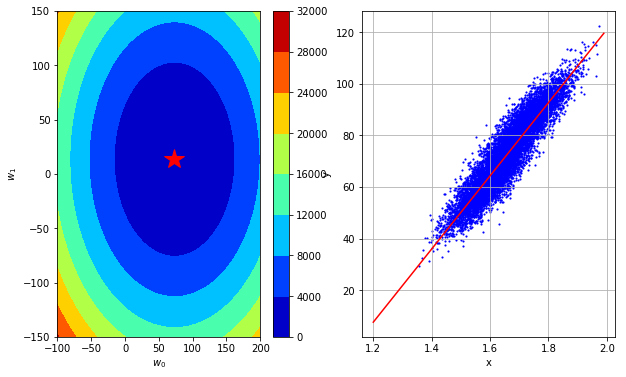

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    N = y.shape[0]
    e = y - tx.dot(w)
    grad_L = -np.dot(tx.T,e)/N
    # ***************************************************
    #raise NotImplementedError
    return grad_L

In [9]:
w_test1 = np.array([100,20])
w_test2 = np.array([50,10])
w_test1 = w_test1.T
w_test2 = w_test2.T
print compute_gradient(y, tx, w_test1)
print compute_gradient(y, tx, w_test2)
## the bigger norm of the grad means that it's far away from the optimun

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma*compute_gradient(y, tx, w)
        # ***************************************************
        #raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.23671276, w0=51.3057454015, w1=9.43579870449
Gradient Descent(1/49): loss=265.302462109, w0=66.6974690219, w1=12.2665383158
Gradient Descent(2/49): loss=37.8783795504, w0=71.314986108, w1=13.1157601992
Gradient Descent(3/49): loss=17.4102121202, w0=72.7002412339, w1=13.3705267643
Gradient Descent(4/49): loss=15.5680770515, w0=73.1158177716, w1=13.4469567338
Gradient Descent(5/49): loss=15.4022848953, w0=73.240490733, w1=13.4698857246
Gradient Descent(6/49): loss=15.3873636012, w0=73.2778926214, w1=13.4767644219
Gradient Descent(7/49): loss=15.3860206847, w0=73.2891131879, w1=13.4788280311
Gradient Descent(8/49): loss=15.3858998223, w0=73.2924793578, w1=13.4794471138
Gradient Descent(9/49): loss=15.3858889446, w0=73.2934892088, w1=13.4796328386
Gradient Descent(10/49): loss=15.3858879657, w0=73.2937921641, w1=13.4796885561
Gradient Descent(11/49): loss=15.3858878775, w0=73.2938830507, w1=13.4797052713
Gradient Descent(12/49): loss=15.3858878696, w0=73.2

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description=u'n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [13]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    N = y.shape[0]
    e = y - tx.dot(w)
    batch_grad = -np.dot(tx.T,e)/N
    # ***************************************************
    # raise NotImplementedError
    return batch_grad 


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent. 
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            w = w - gamma*compute_gradient(minibatch_y, minibatch_tx, w)
        loss = compute_loss(y, tx, w)
    ws.append(w)
    losses.append(loss)
    print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    # ***************************************************
    # raise NotImplementedError
    return losses, ws

In [14]:
y.shape
for i in range(3):
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 2):
        print minibatch_y
tx

[88.52554863 85.08074904]
[58.4712093  79.64663004]
[44.83721336 73.79755492]


array([[ 1.        ,  1.94406149],
       [ 1.        ,  0.62753668],
       [ 1.        ,  2.01244346],
       ...,
       [ 1.        , -0.64968792],
       [ 1.        ,  0.69312469],
       [ 1.        , -1.14970831]])

In [15]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(49/49): loss=15.9422701777, w0=73.0566296969, w1=12.4518715039
SGD: execution time=0.046 seconds


In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
print y.shape[0]

interactive(children=(IntSlider(value=1, description=u'n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

10000


# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Grid Search: loss*=70.8428058087, w0*=75.7575757576, w1*=10.6060606061, execution time=0.170 seconds


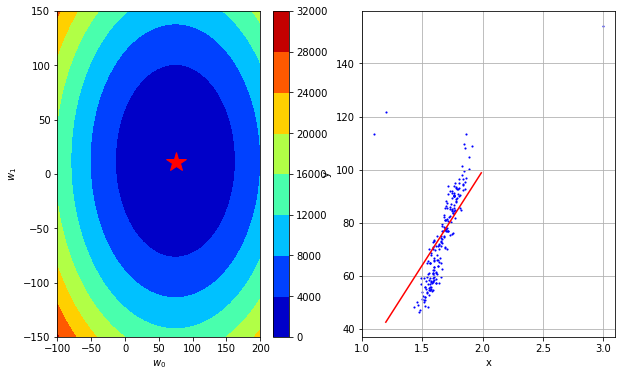

In [21]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [19]:
def compute_loss(y, tx, w):  
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MAE
    e = y - tx.dot(w)
    N = e.shape[0]
    L_w = sum(abs(e))/N
    # ***************************************************
    # raise NotImplementedError
    return L_w

def compute_subgradient(y, tx, w):
    N = y.shape[0]
    e = y - tx.dot(w)
    subgrad = 0.5*sum(e)*sum(tx)
    return subgrad


def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    grads = []
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma*compute_subgradient(y, tx, w)
        grad = compute_subgradient(y, tx, w)
        # ***************************************************
        # raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        grads.append(grad)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, grad={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws))

SyntaxError: invalid syntax (<ipython-input-19-edbee0ca6db5>, line 79)